# 📉 Part 15: Seaborn `pairplot` for Multi-Dimensional Analysis

**Goal:** Learn to use `sns.pairplot()` to visualize relationships between all numerical variables in a dataset at once, and how to add a categorical dimension using `hue`.

---

### Key Learning Objectives
1.  Understand how `sns.pairplot()` automatically creates a grid of scatterplots (off-diagonal) and histograms/KDEs (diagonal).
2.  Use the `vars` parameter to select specific columns for analysis.
3.  Use the `hue` parameter to add a categorical dimension (like 'Survived') and automatically color plots.
4.  Customize pairplots with `diag_kind`, `plot_kws` (for plot keywords), and `palette`.
5.  Use a pairplot to generate visual insights, then use Pandas `groupby` to confirm them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Seaborn theme
sns.set_theme(style="whitegrid") 

print("🎯 LAB 15.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 54, 2, 27, 14, 58, 20, 39, 55, 31, 25, 40, 66, 28, 42, 21, 18],
    'Fare': [7.25, 71.28, 7.92, 53.10, 51.86, 21.08, 11.13, 30.07, 26.55, 8.05, 31.0, 16.0, 26.0, 7.90, 227.52, 10.5, 26.0, 13.0, 7.74, 7.05],
    'Pclass': [3, 1, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
})

# Drop rows with missing values for this analysis
titanic_df = titanic_df.dropna(subset=['Age'])

print("✅ Titanic data and correlation matrix loaded.")

🎯 LAB 15.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data and correlation matrix loaded.


## 1. The Basic Pairplot

The simplest call, `sns.pairplot(df)`, creates a scatterplot for every numerical column against every other, and a histogram on the diagonal. It's a powerful "first look" at your data's relationships.

🎯 LAB 15.2: Basic Pairplot



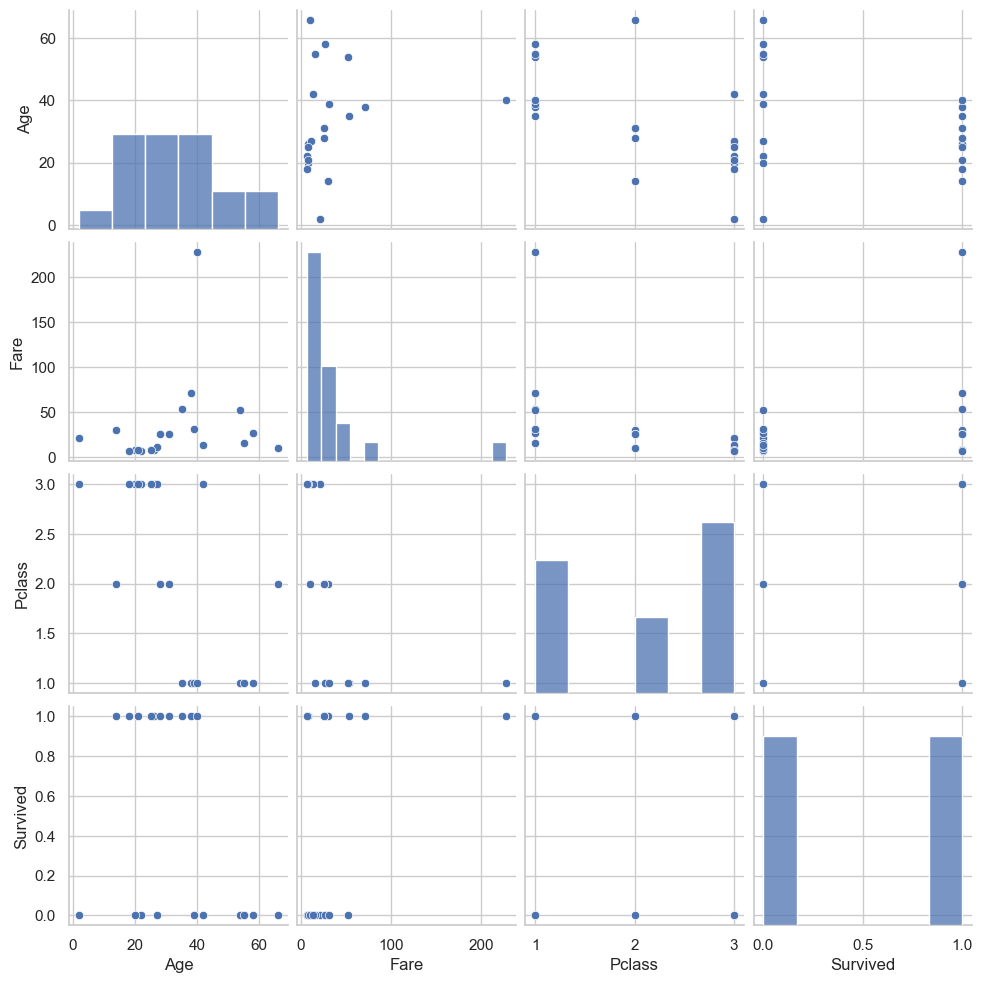


✅ Lab 1 Complete!


In [2]:
print("🎯 LAB 15.2: Basic Pairplot\n")

# Pass the entire DataFrame to pairplot
# Seaborn automatically finds all the numeric columns
sns.pairplot(titanic_df)

plt.show()

print("\n✅ Lab 1 Complete!")

## 2. Selecting Specific Features (`vars`)

A pairplot with many columns can be unreadable. It's better to select only the features you are interested in using the `vars` parameter.

🎯 LAB 15.3: Selecting Specific Features



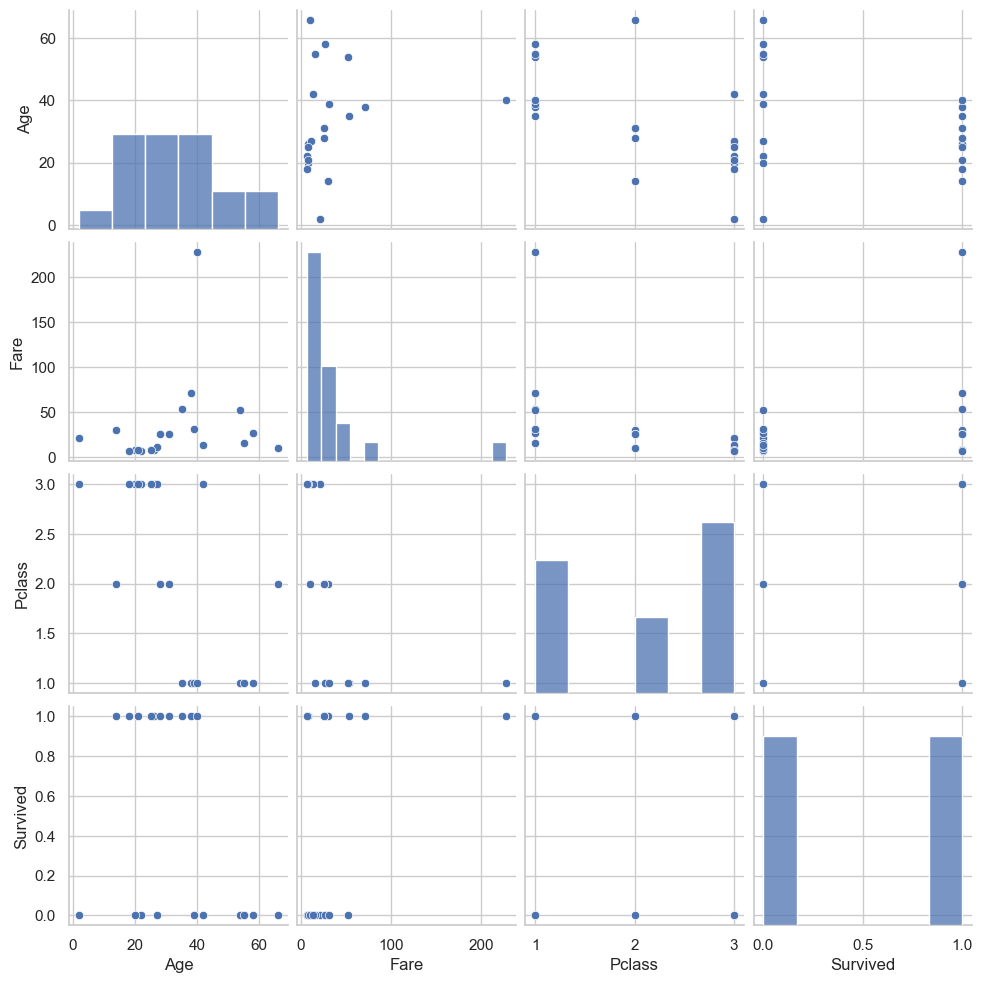


✅ Lab 2 Complete!


In [3]:
print("🎯 LAB 15.3: Selecting Specific Features\n")

# Use the `vars` parameter to specify which columns to plot
sns.pairplot(
    data=titanic_df, 
    vars=['Age', 'Fare', 'Pclass', 'Survived']
)

plt.show()

print("\n✅ Lab 2 Complete!")

## 3. Adding a Categorical Dimension with `hue`

This is the most powerful feature. The `hue` parameter automatically colors all points based on a categorical column (like 'Survived') and creates a legend.

🎯 LAB 15.4: Adding `hue` for Deeper Insight



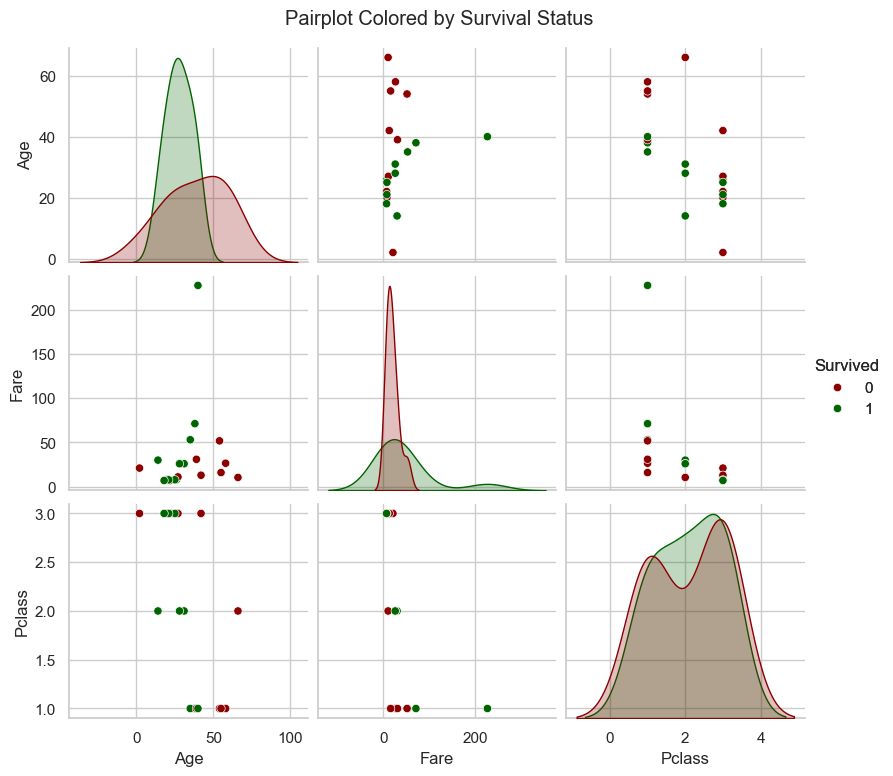


✅ Lab 3 Complete!


In [4]:
print("🎯 LAB 15.4: Adding `hue` for Deeper Insight\n")

# We plot the features and color them by 'Survived'
g = sns.pairplot(
    data=titanic_df,
    vars=['Age', 'Fare', 'Pclass'], # Features to plot
    hue='Survived',                # Column to use for coloring
    palette={0: 'darkred', 1: 'darkgreen'} # Custom color palette
)

g.fig.suptitle("Pairplot Colored by Survival Status", y=1.03) # Add a title
g.add_legend()

plt.show()

print("\n✅ Lab 3 Complete!")

## 4. Customizing Diagonals and Plot Keywords

You can customize the plots further:
* `diag_kind='kde'`: Changes the diagonal plots from histograms to Kernel Density Estimates (KDEs).
* `plot_kws={...}`: A dictionary of arguments passed to the scatterplots (e.g., `alpha` for transparency).

🎯 LAB 15.5: Customizing Plots (diag_kind, plot_kws)



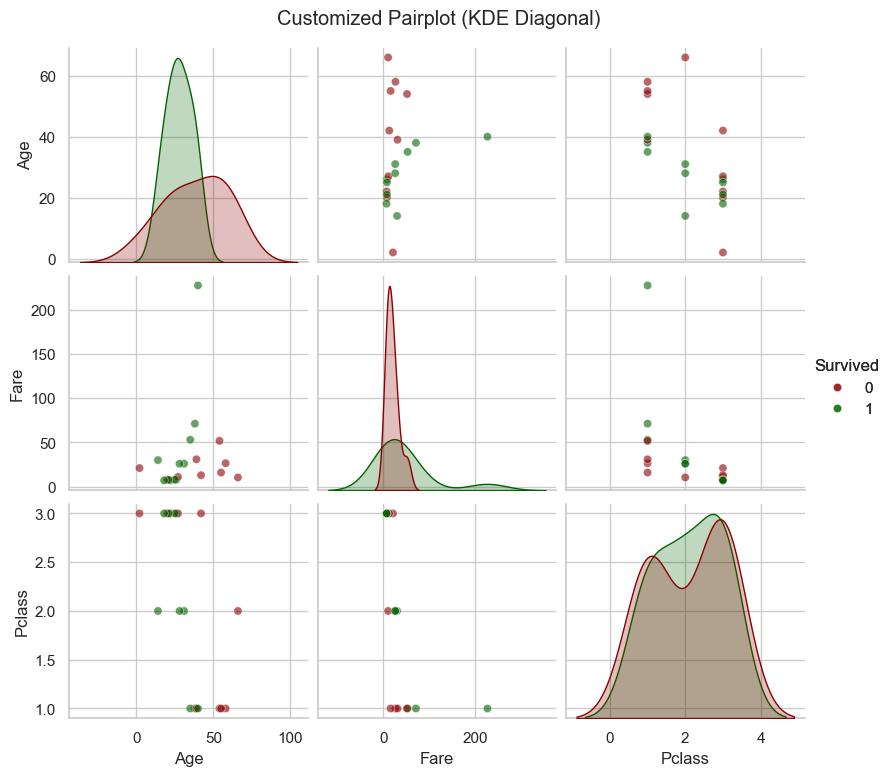


✅ Lab 4 Complete!


In [5]:
print("🎯 LAB 15.5: Customizing Plots (diag_kind, plot_kws)\n")

g = sns.pairplot(
    data=titanic_df,
    vars=['Age', 'Fare', 'Pclass'],
    hue='Survived',
    palette={0: 'darkred', 1: 'darkgreen'},
    diag_kind='kde', # Change diagonal to density plots
    plot_kws={'alpha': 0.6} # Make scatterplots 60% transparent
)

g.fig.suptitle("Customized Pairplot (KDE Diagonal)", y=1.03)
g.add_legend()

plt.show()

print("\n✅ Lab 4 Complete!")

## 5. Practice Project: Analysis from a Pairplot

A pairplot is not just a visual; it's an analysis tool. We can use it to spot trends and then use Pandas to confirm our findings.

Here, we'll create the final, polished pairplot, save it, and then print some insights we can gather from it.

🎯 LAB 15.6: PRACTICE PROJECT - Final Pairplot and Insights

💾 Plot saved as 'seaborn_part15_pairplot_report.png'


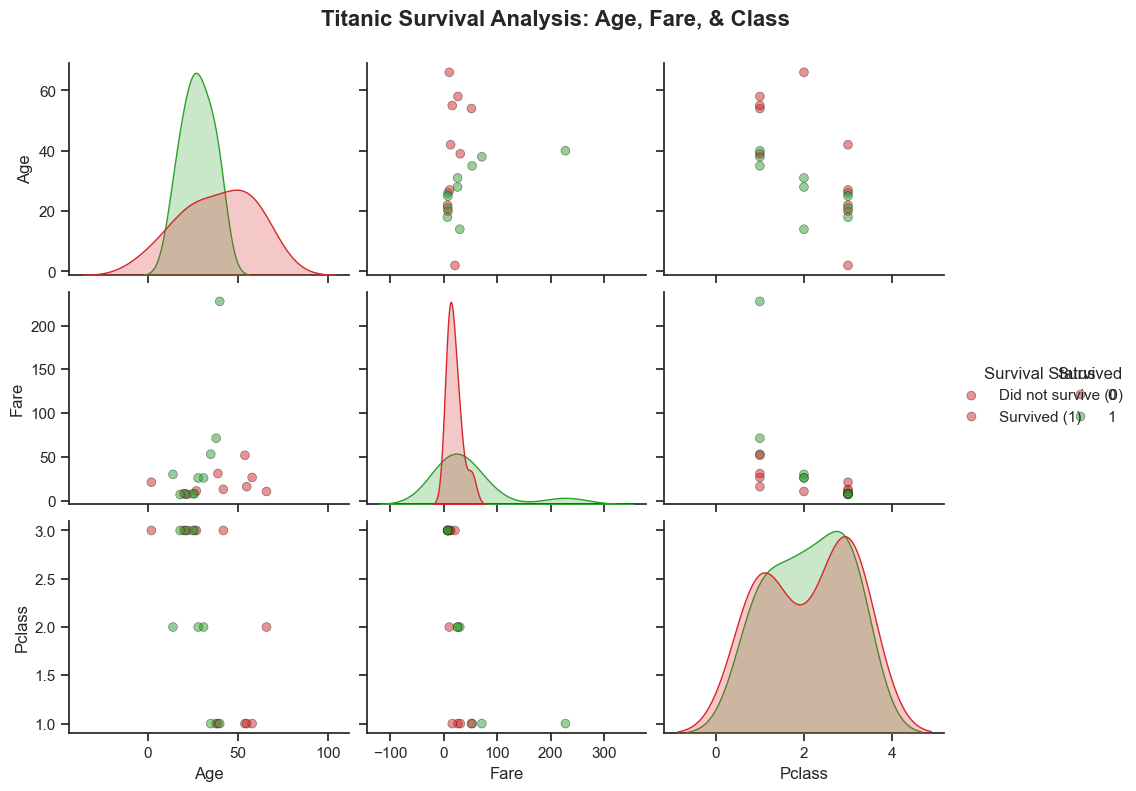


--- INSIGHTS FROM PLOT ---

Survived (Green) Group Analysis:
  Average Age: 27.6
  Average Fare: £46.46
  Most common class: 3

Did Not Survive (Red) Group Analysis:
  Average Age: 38.5
  Average Fare: £19.64
  Most common class: 3

💡 Key Insights from Pairplot:
• Pairplots show ALL relationships at once
• Diagonal shows distribution of each feature
• Off-diagonal shows scatter between features
• Hue helps identify survival patterns (e.g., lower Pclass and higher Fare seem linked to survival)

✅ Lab 5 Complete!
🎉 Part 15 Complete: You can analyze multiple features together!


In [6]:
print("🎯 LAB 15.6: PRACTICE PROJECT - Final Pairplot and Insights\n")

# 1. Set a final theme
sns.set_theme(style="ticks")

# 2. Create the final plot
g = sns.pairplot(
    data=titanic_df,
    hue='Survived',
    vars=['Age', 'Fare', 'Pclass'],
    palette={0: '#D62728', 1: '#2CA02C'}, # Specific red/green
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 40, 'edgecolor': 'k'}, # Add black edges to markers
    height=2.5, # Make the plot a bit smaller
    aspect=1.2 # Make plots wider than they are tall
)

g.fig.suptitle('Titanic Survival Analysis: Age, Fare, & Class', fontsize=16, fontweight='bold', y=1.05)
g.add_legend(title='Survival Status', labels=['Did not survive (0)', 'Survived (1)']) # Add custom labels

# 3. Save the figure
try:
    g.savefig('seaborn_part15_pairplot_report.png', dpi=300)
    print("💾 Plot saved as 'seaborn_part15_pairplot_report.png'")
except Exception as e:
    print(f"❌ Error saving plot: {e}")
    
plt.show()


# 4. Use Pandas to confirm insights from the plots
print("\n--- INSIGHTS FROM PLOT ---")

# Analyze the 'Survived' (1) group
print("\nSurvived (Green) Group Analysis:")
survived_data = titanic_df[titanic_df['Survived'] == 1]
print(f"  Average Age: {survived_data['Age'].mean():.1f}")
print(f"  Average Fare: £{survived_data['Fare'].mean():.2f}")
print(f"  Most common class: {survived_data['Pclass'].mode()[0]}")

# Analyze the 'Did not survive' (0) group
print("\nDid Not Survive (Red) Group Analysis:")
not_survived_data = titanic_df[titanic_df['Survived'] == 0]
print(f"  Average Age: {not_survived_data['Age'].mean():.1f}")
print(f"  Average Fare: £{not_survived_data['Fare'].mean():.2f}")
print(f"  Most common class: {not_survived_data['Pclass'].mode()[0]}")

print("\n💡 Key Insights from Pairplot:")
print("• Pairplots show ALL relationships at once")
print("• Diagonal shows distribution of each feature")
print("• Off-diagonal shows scatter between features")
print("• Hue helps identify survival patterns (e.g., lower Pclass and higher Fare seem linked to survival)")

print("\n✅ Lab 5 Complete!")
print("🎉 Part 15 Complete: You can analyze multiple features together!")